In [129]:
import torchvision #for mnist dataset
import gzip
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [7]:
torchvision.datasets.MNIST('./mnist',download=True)

0.3%

100.0%


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100.0%

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw




100.0%
100.0%


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [11]:
!ls mnist/MNIST/raw/

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [18]:
import os
os.path.join(os.getcwd(),'mnist/MNIST/raw/t10k-images-idx3-ubyte.gz')

'/home/zainhas/Projects/nn_from_scratch/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz'

In [97]:
import gzip, os
def load(loc):
    path = os.path.join(os.getcwd(),loc)
    f = gzip.open(path, 'r')
    buf = f.read()
    return np.frombuffer(buf, dtype=np.uint8).astype(np.float32).copy()

In [98]:
X_test = load('mnist/MNIST/raw/t10k-images-idx3-ubyte.gz')[16:].reshape((-1,28,28))
X_train = load('mnist/MNIST/raw/train-images-idx3-ubyte.gz')[16:].reshape((-1,28,28))
Y_train = load('mnist/MNIST/raw/train-labels-idx1-ubyte.gz')[8:]
Y_test = load('mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz')[8:]

In [99]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

This is a 5.0


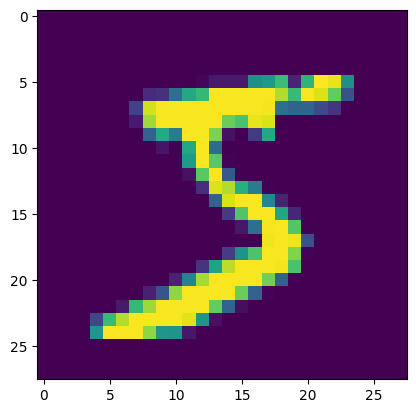

In [100]:
print(f"This is a {Y_train[0]}")
plt.imshow(X_train[0]);

In [179]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ZNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28,100, bias=False)
        self.layer2 = nn.Linear(100,10, bias=False)
        self.sm = nn.Softmax(dim=1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        #x = self.sm(x)
        return x

In [186]:
model = ZNet()

#Loss function -> categorical_cross_entropy

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
batch_size = 64
loss_, acc_ = [], []
for i in (t := trange(500)):
    #batch and sample
    sample = np.random.randint(0,X_train.shape[0]-1,size=batch_size)
    x = torch.tensor(X_train[sample].reshape(-1,28*28))
    y = torch.tensor(Y_train[sample]).long()
    
    #zero the gradients
    optimizer.zero_grad()
    #forward
    out = model(x)
    
    #compute accuracy
    pred = torch.argmax(out,dim=1)
    acc = (pred == y).float().mean()
    
    #compute loss
    loss = loss_func(out,y)
    #backward
    loss.backward()
    #Update the params
    optimizer.step()
    loss_.append(loss.item())
    acc_.append(acc.item())
    t.set_description(f"Loss: {loss:.2f}, Train Acc: {acc:.2f}")

Loss: 0.52, Train Acc: 0.89: 100%|███████████████████████████████████████████████████| 500/500 [00:00<00:00, 697.57it/s]


(-0.5, 3.0)

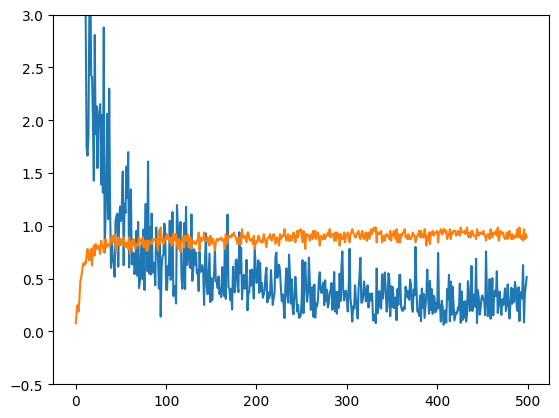

In [241]:
plt.plot(loss_)
plt.plot(acc_)
plt.ylim(-0.5,3)

In [192]:
#Test accuracy
X_test_ = torch.tensor(X_test.reshape(-1,28*28))
Y_test_ = torch.tensor(Y_test).long()

test_out = model(X_test_)
test_pred = torch.argmax(test_out,dim=1)

test_acc = (test_pred == Y_test_).float().mean()
print(f"Test Acc = {test_acc:.2f}")

Test Acc = 0.90


Label: 8.0
tensor(8)


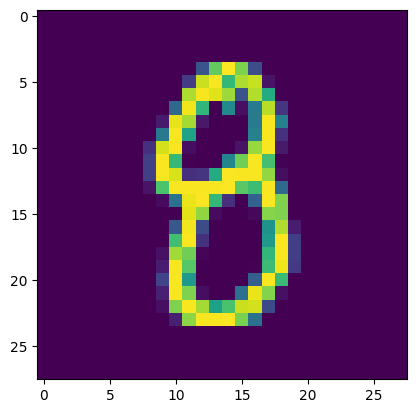

In [203]:
single_point = 4124 
print(f"Label: {Y_test[single_point]}")
plt.imshow(X_test[single_point]);
print(torch.argmax(model(X_test_[single_point])))

In [ ]:
#Test from the wild!

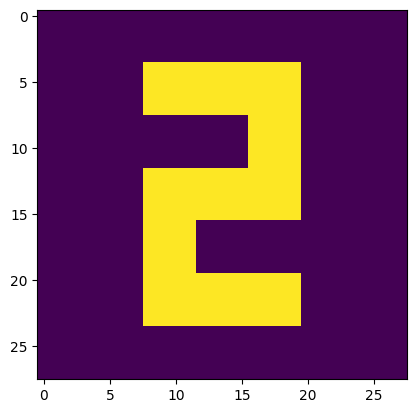

In [236]:
m =   [[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
plt.imshow(m.reshape(28,28))

In [237]:
pyt_m = torch.tensor(m.astype(np.float32))

In [238]:
torch.argmax(model(pyt_m))

tensor(2)